<!--COURSE_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://user-images.githubusercontent.com/16768318/73986808-75b3ca00-4936-11ea-90f1-3a6c352766ce.png" width=10% >
<img align="right" style="padding-left:10px;" src="https://user-images.githubusercontent.com/16768318/73986811-764c6080-4936-11ea-9653-a3eacc47caed.png" width=10% >

**Bienvenidos!** Este *colab notebook* es parte del curso [**Introduccion a Google Earth Engine con Python**](https://github.com/csaybar/EarthEngineMasterGIS) desarrollado por el equipo [**MasterGIS**](https://www.mastergis.com/). Obten mas informacion del curso en este [**enlace**](https://www.mastergis.com/product/google-earth-engine-python/). El contenido del curso esta disponible en [**GitHub**](https://github.com/csaybar/EarthEngineMasterGIS) bajo licencia [**MIT**](https://opensource.org/licenses/MIT).

# **MASTERGIS: Como inicializar la Earth Engine Python API**

En esta lectura, aprenderemos sobre como inicializar la Earth Engine Python API (**oauth2**).


In [ ]:
#!pip install earthengine-api
import ee
ee.Initialize()

<center>
<img src='https://user-images.githubusercontent.com/16768318/72866807-9512ec00-3cd4-11ea-8263-33cfd6c3db85.png' width="65%">
</center>

### **1) Inicializa la Earth Engine de Python**

In [ ]:
!earthengine authenticate 

### **2) Autentifica la Earth Engine Python API  como un experto!**

In [ ]:
# Funciones necesarias debido a cambios recientes en la API!
import os
import base64
import hashlib

def _base64param(byte_string):
  """Encodes bytes for use as a URL parameter."""
  return base64.urlsafe_b64encode(byte_string).rstrip(b'=')

def create_codes():
  code_verifier = _base64param(os.urandom(32))
  code_challenge = _base64param(hashlib.sha256(code_verifier).digest())
  return code_verifier, code_challenge

In [ ]:
#!earthengine authenticate 
# Debido a cambios recientes en la API iniciar de esta forma
oauth_codes = create_codes()
earthengine_auth = ee.oauth.get_authorization_url(oauth_codes[1])
earthengine_auth

In [ ]:
auth_code = "Poner el codigo de autorizacion AQUI"
ee_token = ee.oauth.request_token(auth_code, oauth_codes[0])
ee_token

In [ ]:
#@title Credenciales Google Earth Engine
import os 
credential = '{"refresh_token":"PON_AQUI_TU_TOKEN"}'
credential_file_path = os.path.expanduser("~/.config/earthengine/")
os.makedirs(credential_file_path,exist_ok=True)
with open(credential_file_path + 'credentials', 'w') as file:
    file.write(credential)

In [ ]:
import ee 
ee.Authenticate()
ee.Initialize()

### **3) Crear mapas interactivos**

In [ ]:
#@title mapdisplay: Crea mapas interactivos usando folium
import folium
def mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    :param center: Center of the map (Latitude and Longitude).
    :param dicc: Earth Engine Geometries or Tiles dictionary
    :param Tiles: Mapbox Bright,Mapbox Control Room,Stamen Terrain,Stamen Toner,stamenwatercolor,cartodbpositron.
    :zoom_start: Initial zoom level for the map.
    :return: A folium.Map object.
    '''
    center = center[::-1]
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)
    for k,v in dicc.items():
      if ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = v["tile_fetcher"].url_format,
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz)
    mapViz.add_child(folium.LayerControl())
    return mapViz

### **4. Estructuras de datos fundamentales de Earth Engine**

Las dos estructuras de datos espaciales mas fundamentales en Earth Engine son **`Image`** y **` Feature`** correspondientes a los tipos de datos raster y vectoriales, respectivamente. Las imagenes estan compuestas por bandas y un diccionario de propiedades. Los **features** se componen de una **`Geometria`** y un diccionario de propiedades. Una pila de imagenes (por ejemplo, una serie temporal de imagenes) se maneja mediante un **`ImageCollection`**. Una coleccion de features es manejada por un **`FeatureCollection`**. Otras estructuras de datos fundamentales en Earth Engine incluyen:

- `Diccionario`
- `Lista`
- `Matriz`
- `Geometría`
- `Fecha`
- `Número`
- `Cadena`.

Es importante recordar que estos objetos son todos **objetos del lado del servidor (o contenedores)**. Es decir, su navegador (cliente) no sabe nada sobre los objetos en su secuencia de comandos a menos que solicite explicitamente informacion sobre ellos (**\*.getInfo()**). Esa solicitud activa un mensaje que se pasa del servidor web a la API de Python. Si el mensaje es grande, la conexion se volvera lenta. existentem dos formas de inspeccionar **contenedores de Earth Engine** en la consola de Python. El primero, `print()` que devuelve información de la peticion (como JSON) y `* .getInfo ()` que devuelve el contenido del `contenedor`. La siguiente sección resume todas las estructuras de datos mencionadas anteriormente.

#### **String**

Defina un String de Python, luego colóquela en el contenedor **`ee.String()`** para enviarlo a Earth Engine:

In [ ]:
# Defina una cadena, luego pongala en un contenedor de GEE.
aString = 'To the cloud!'
eeString = ee.String(aString)
print('Where to?', eeString)
eeString

Where to? ee.String("To the cloud!")


Piense en **`ee.Thing`** como un contenedor para algo que existe en el servidor. En este ejemplo, la cadena se define primero, luego se coloca en el contenedor.

#### **Number**

Use **`ee.Number()`** para crear objetos numericos en el servidor.

In [ ]:
import numpy as np
serverNumber = ee.Number(np.e)
print('e=', serverNumber)
serverNumber

#### **Lists**

Para hacer una lista de Python en un objeto **`ee.List`** en el servidor, puede poner un lista de Python en un contenedor como con numeros y cadenas. Earth Engine tambien proporciona metodos del lado del servidor para hacer secuencias de numeros.

In [ ]:
eeList = ee.List([1, 2, 3, 4, 5])
sequence = ee.List.sequence(1, 5);

print('Secuencia:', sequence)
print('Abrir el contenedor:', sequence.getInfo())

####**Dictionaries**

Puede construir un "_Diccionario_" de Earth Engine a partir de un objeto Python, como con strings, numeros y listas. En el momento de la construccion, puede usar la funcionalidad de Python para inicializar el objeto Earth Engine. En este caso, un **ee.Dictionary** se construye directamente a partir de un objeto literal de Python:

In [ ]:
dicccionario_de_python = {
  'e': np.e,
  'pi': np.pi,
  'phi': (1 + np.sqrt(5))/2
}

ee_dict  = ee.Dictionary(dicccionario_de_python)

# Obtener valores del diccionario
print('Euler:', ee_dict.get('e').getInfo())
print('Pi:', ee_dict.get('pi').getInfo())
print('Golden ratio:', ee_dict.get('phi').getInfo())

# Obtener todas las llaves
print('Keys: ', ee_dict.keys().getInfo())

Euler: 2.718281828459045
Pi: 3.141592653589793
Golden ratio: 1.618033988749895
Keys:  ['e', 'phi', 'pi']


####**Dates**

Los objetos de fecha son la forma en que Earth Engine representa el tiempo. Como en los ejemplos anteriores, es importante distinguir entre un objeto "Python Date" y un objeto Earth Engine `ee.Date`.

Se puede construir un `ee.Date` a partir de:
   - Un string.
   - Un Objeto Python [datetime] (https://docs.python.org/3/library/datetime.html).
   - Métodos estaticos proporcionados por la clase `ee.Date`.
  


In [ ]:
# Defina un objeto date en Earth Engine.
date = ee.Date('2015-12-31')
print('Date:', date)
print('Date:', date.getInfo())

In [ ]:
import datetime as dt
now = dt.datetime.now()
print('Millisegundos desde el primero de enero de 1970: ', now)

eeNow = ee.Date(now)
print('Now:', eeNow)

### **5) Hello world**
**Vizualize los datos SRTM a nivel mundial**

In [ ]:
image = ee.Image('CGIAR/SRTM90_V4')
print(image)

In [ ]:
image.getInfo()

<center>
<img src='https://user-images.githubusercontent.com/16768318/72869359-e030fd00-3cdc-11ea-955b-ec275406e262.png' width="45%">
</center>

- **ee.Image.getMapId(vis_params=None)**: Obtenga y devuelva un diccionario de ID de mapa, adecuado para usar en una superposicion de mapa.

In [ ]:
inferno_pal = ["#000004", "#560F6D", "#BB3654", "#F98C09", "#FCFFA4"]
center = [0,0]
mydicc = {'simple': image.getMapId(),
          'inferno': image.getMapId({'min':0,'max':5000,'palette':inferno_pal})}
mapdisplay(center, mydicc, Tiles="OpensTreetMap",zoom_start=4)

**Vizualize sus propios datos!**

In [ ]:
rain_peru = ee.Image('users/csaybardemo/P99')
nc_shp = ee.FeatureCollection('users/csaybardemo/nc_wgs84')

dicc_viz_02 = {'rain_peru_max': rain_peru.getMapId({'min':0,'max':200}),
               'nc_wgs84': nc_shp.getInfo()}
center = [-76,-12]
mapdisplay(center,dicc_viz_02,zoom_start=7)

**Cree un diagrama de dispersión**

In [ ]:
# matplotlib.pyplot: Esta es una libreria para realizar graficos estaticos
import matplotlib.pyplot as plt

# Obtenga una imagen Landsat.
img = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')
centroid = img.geometry().centroid().getInfo()['coordinates']
mydicc = {'landsat5': img.getMapId({'min':0,'max':0.5,'bands':['B5','B4','B3']})}
mapdisplay(centroid, mydicc, Tiles="OpensTreetMap",zoom_start=9)

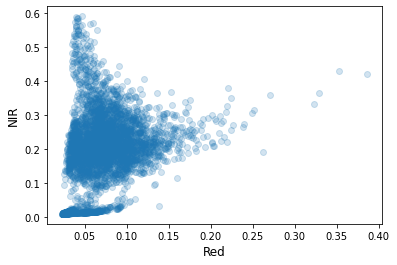

In [ ]:
# Seleccione las bandas rojas y NIR, escalelas y muestree 500 puntos.
samp_fc = img.select(['B4','B5']).sample(scale=30, numPixels=5000)
ee.Reducer.toList().repeat(2).getInfo()
# Organice la muestra como una lista de listas.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B4', 'B5'])
ee.Reducer.toList().repeat(2).getInfo()
samp_list = ee.List(samp_dict.get('list'))

# Guardar ee.List del lado del servidor como una lista de Python del lado del cliente.
samp_data = samp_list.getInfo()

# Visualice un diagrama de dispersion Red vs NIR usando matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

### **¿Dudas con este Jupyer-Notebook?**

Estaremos felices de ayudarte!. Create una cuenta Github si es que no la tienes, luego detalla tu problema ampliamente en: https://github.com/csaybar/EarthEngineMasterGIS/issues

**Tienes que dar clic en el boton verde!**

<center>
<img src="https://user-images.githubusercontent.com/16768318/79680748-d5511000-81d8-11ea-9f89-44bd010adf69.png" width = 70%>
</center>